${\large \text{Introduction to fft in Python:}}$

$${\large \hspace{10mm}
\begin{equation}
y(t) = 20\sin(20\pi t) + 7\sin(100 \pi t) + \text{noise}
\end{equation}
}
$$

${\large \text{The two main frequencies and periods are:}}$

$${\large \hspace{10mm}
\begin{equation}
2\pi f_1 = 20\pi \longrightarrow f_1 = 10 \quad \text{and} \quad T_1 = \frac{1}{f_1} = \frac{1}{10}
\end{equation}
}
$$

$${\large \hspace{10mm}
\begin{equation}
2\pi f_2 = 100\pi \longrightarrow f_2 = 50 \quad \text{and} \quad T_2 = \frac{1}{f_2} = \frac{1}{50}
\end{equation}
}
$$

In [178]:
import numpy as np

Nt = 999
Tend = 1
t = np.linspace(0, Tend, Nt + 1)
y = 20 * np.sin(20 * np.pi * t) + 7 * np.sin(100 * np.pi * t) + 5*np.random.random(Nt + 1)

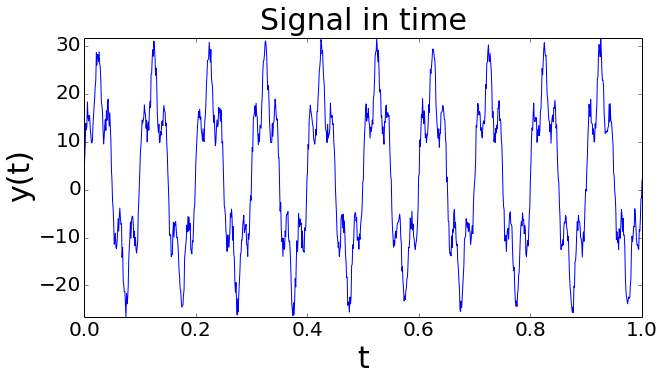

In [179]:
import matplotlib
import matplotlib.pyplot as plt
# Plotting Jazz
# import mpld3
%matplotlib inline
# mpld3.enable_notebook()
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)

fig01 = plt.figure(1, figsize=(10, 5), dpi=90)
ax = plt.axes(xlim=(0, Lt), ylim=(min(y), max(y)))
ax.plot(t, y)

ax.set_title("Signal in time", fontsize=30, y=1.01)
ax.set_xlabel('t', fontsize=30)
ax.set_ylabel('y(t)', fontsize=30)

plt.show()

${\large \text{Goal $\longrightarrow$ Use $f(t)$ to find out the two main frequencies} }$

$${\large \hspace{10mm}
\begin{equation}
f_1 = 10 \quad \text{and} \quad f_2 = 50
\end{equation}
}
$$

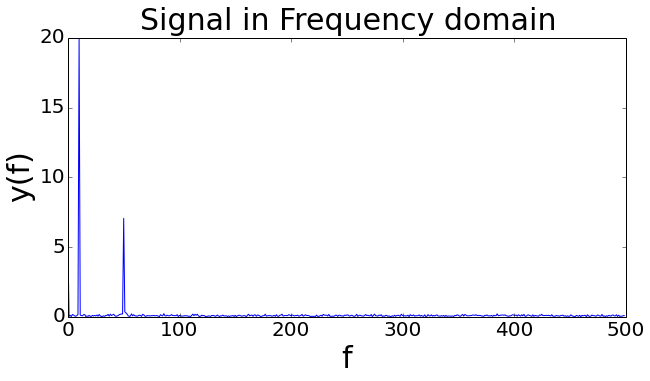

In [180]:
from numpy.fft import *

tLen = len(t)
ts = t[1] - t[0]
fs = 1.0 / ts
f = [i * fs / float(tLen) for i in range(0, tLen/2)]
yf = (abs(fft(y))[0:tLen/2])

yfFinal = [i/float(tLen/2.0) for i in yf]
fig02 = plt.figure(1, figsize=(10, 5), dpi=90)
ax = plt.axes()
ax.plot(f, yfFinal)

ax.set_title("Signal in Frequency domain", fontsize=30, y=1.01)
ax.set_xlabel('f', fontsize=30)
ax.set_ylabel('y(f)', fontsize=30)
plt.show()